In [2]:
library('igraph')
library('Matrix')
library('pracma')

In [3]:
load("./g1000.RData")

In [4]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

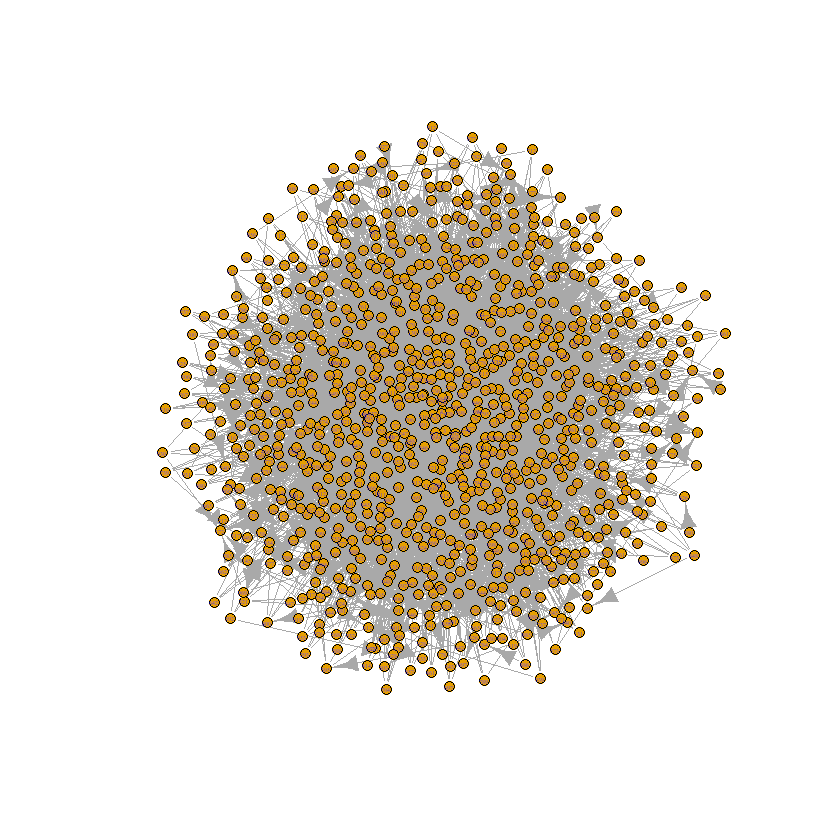

In [52]:
set.seed(1)
g7 = barabasi.game(1000, m=4, directed=T)
plot(g7,vertex.size=4, vertex.label.cex=0.3)

tm7 = create_transition_matrix(g7)
num_steps = 100
record = rep(0, vcount(g7))
for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        # fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        record[v] = record[v] + 1
        PMF = tm7[v, ]
        v = sample(1:vcount(g7), 1, prob = PMF)        
    }
}

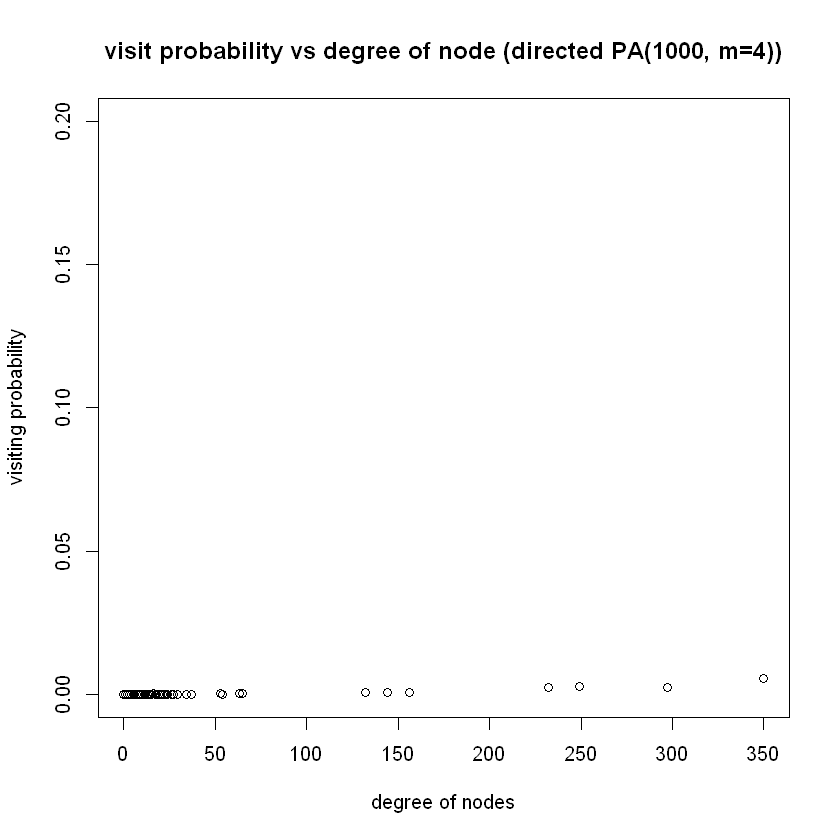

In [53]:
plot(degree(g7, mode='in'), record/num_steps/100, main="visit probability vs degree of node (directed PA(1000, m=4))", xlab="degree of nodes", ylab="visiting probability", ylim=c(0,0.2))

**b.**

In [48]:
record = rep(0, vcount(g7))
alpha = 0.15
tm7_1 = tm7*(1-alpha) + alpha/vcount(g7)*ones(vcount(g7))
for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        record[v] = record[v] + 1
        PMF = tm7_1[v, ]
        v = sample(1:vcount(g7), 1, prob = PMF)
    }
}

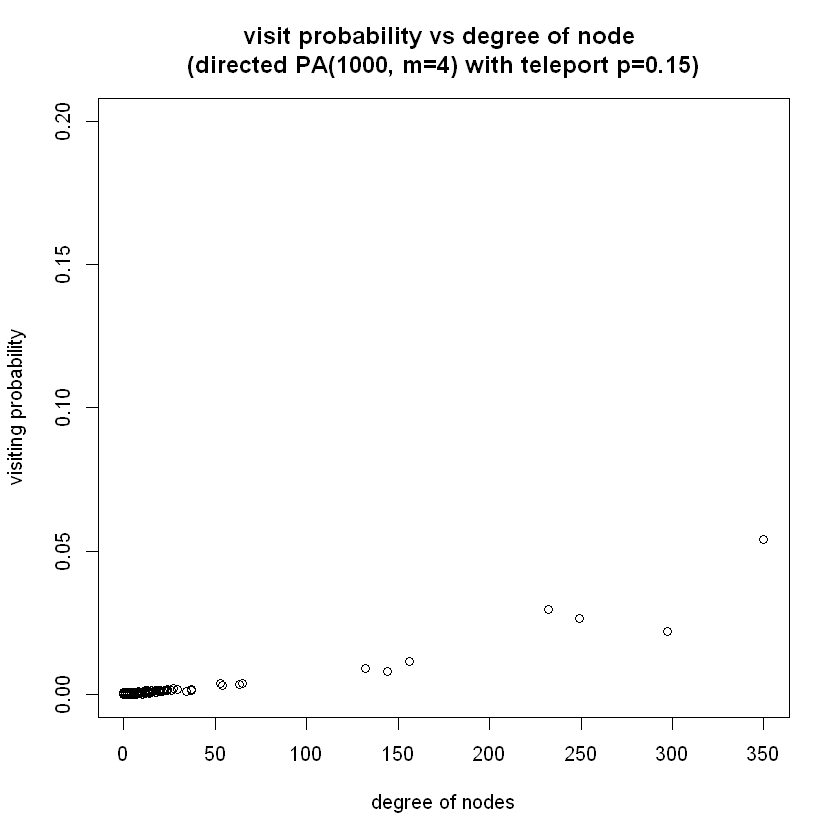

In [51]:
plot(degree(g7, mode='in'), record/num_steps/100, main="visit probability vs degree of node \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="degree of nodes", ylab="visiting probability", ylim=c(0,0.2))

### 4

In [25]:
record = rep(0, vcount(g7))
alpha = 0.15
pagerank = degree(g7)
pageprob = pagerank/sum(pagerank)

for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        record[v] = record[v] + 1
        if (runif(1,0,1) < alpha){
            v = sample(1:vcount(g7), 1, prob = pageprob)
        } else {
            PMF = tm7[v, ]
            v = sample(1:vcount(g7), 1, prob = PMF)
        }
    }
}

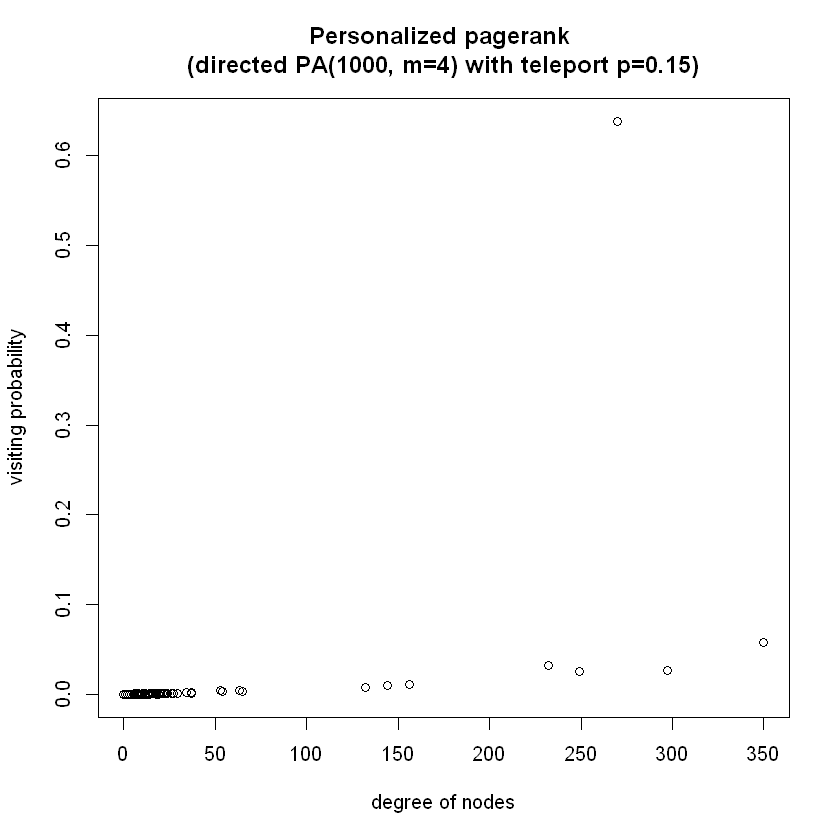

In [26]:
plot(degree(g7, mode='in'), record/num_steps/100, main="Personalized pagerank \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="degree of nodes", ylab="visiting probability")

**b.**

In [36]:
two_med = order(pageprob)[500:501]

[1] 986 987
[1] 4 4


In [37]:
record = rep(0, vcount(g7))
alpha = 0.15

for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        record[v] = record[v] + 1
        if (runif(1,0,1) < alpha){
            v = sample(two_med, 1, prob = c(0.5, 0.5))
        } else {
            PMF = tm7[v, ]
            v = sample(1:vcount(g7), 1, prob = PMF)
        }
    }
}

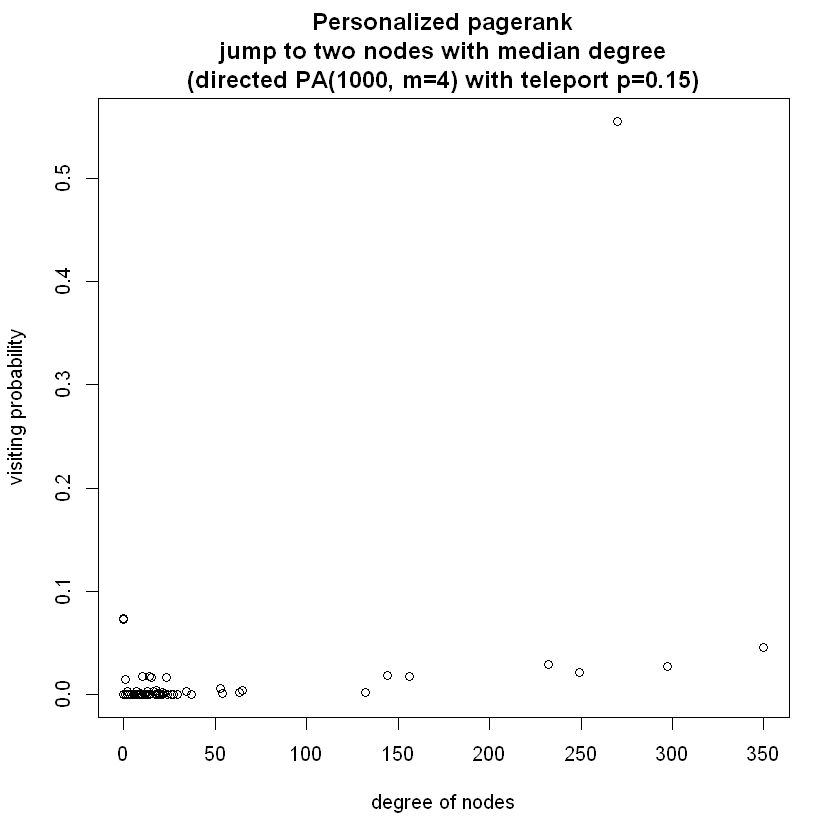

In [41]:
plot(degree(g7, mode='in'), record/num_steps/100, 
     main="Personalized pagerank\n jump to two nodes with median degree \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="degree of nodes", ylab="visiting probability")

**c.**

In [42]:
record = rep(0, vcount(g7))
alpha = 0.15
setsize = 10

for (vstart in sample(1:vcount(g7), 100)){
    v = vstart
    for(i in 1:num_steps){
        record[v] = record[v] + 1
        if (runif(1,0,1) < alpha){
            v = sample(order(pagerank)[-(1:(vcount(g7)-setsize))], 1, prob = rep(1/setsize, setsize))
        } else {
            PMF = tm7[v, ]
            v = sample(1:vcount(g7), 1, prob = PMF)
        }
    }
}

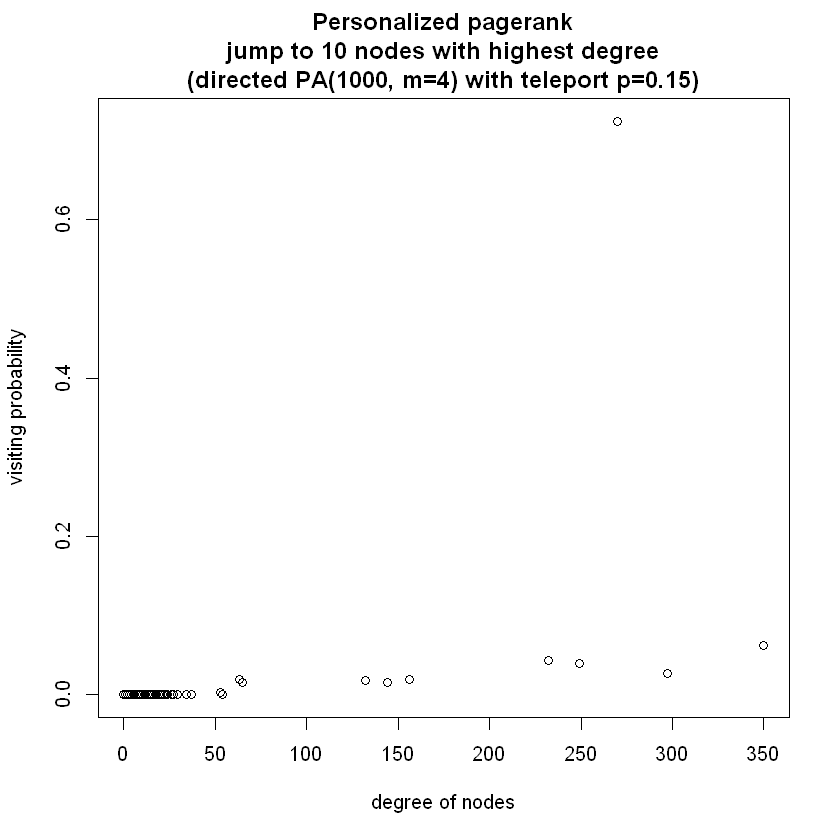

In [43]:
plot(degree(g7, mode='in'), record/num_steps/100, 
     main="Personalized pagerank\n jump to 10 nodes with highest degree \n(directed PA(1000, m=4) with teleport p=0.15)", xlab="degree of nodes", ylab="visiting probability")